2.3.3 線形モデル

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

w[0]: 0.393906  b: -0.031804


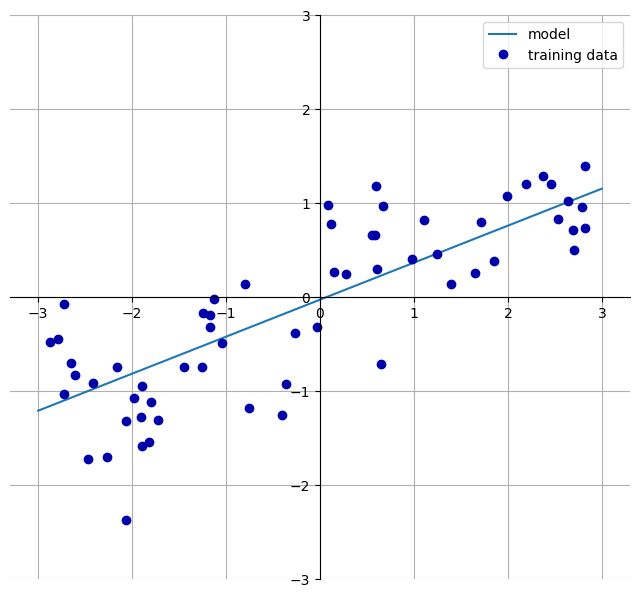

In [2]:
mglearn.plots.plot_linear_regression_wave()

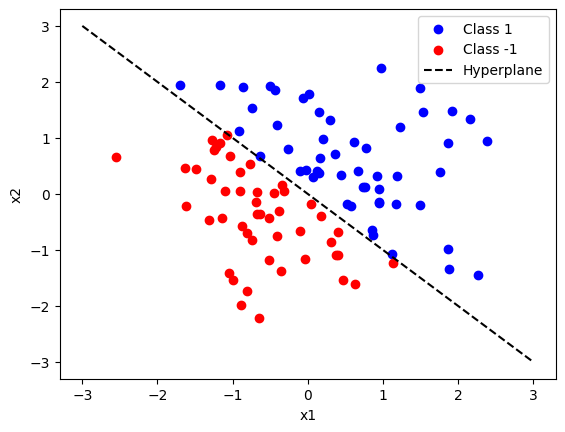

In [3]:
# 超平面の説明
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータの生成
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# 超平面のパラメータ
w = np.array([1, 1])
b = 0

# 超平面のプロット
x1 = np.linspace(-3, 3, 100)
x2 = -(w[0] * x1 + b) / w[1]

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.plot(x1, x2, color='black', linestyle='--', label='Hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 適合不足であって，過剰適合ではない

Training set score: 0.67
Test set score: 0.66


In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 過剰適合が起きている

Training set score: 0.95
Test set score: 0.61


2.3.3.3 リッジ回帰

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Traingin set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Traingin set score: 0.89
Test set score: 0.75


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

# alphaを大きくすると，計数はより0に近くなり，
# 訓練セットに対する性能は低下するが，汎化性能は向上する

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

# alphaを小さくすると，係数の制約は小さくなる．

# alphaが非常に小さい値になると，係数への制約はほとんどなくなり，
# 線形回帰(LinearRegression)と同じになる

Training set score: 0.93
Test set score: 0.77


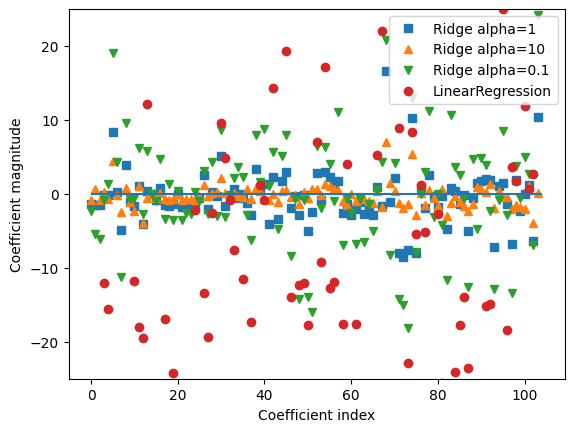

In [12]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [13]:
#  結果の説明
"""
この図は、異なる正則化パラメータ（alpha）を持つリッジ回帰モデルと通常の線形回帰モデルの係数を比較しています。

横軸（Coefficient index）:
- 特徴量（説明変数）のインデックスを表しています。
- 0から100以上まであることから、100以上の特徴量がモデルに使用されていることがわかります。

縦軸（Coefficient magnitude）:
- 各特徴量に対応する係数の大きさ（値）を表しています。
- -25から25の範囲で表示されています。

図の解説:
1. LinearRegression（赤い丸）:
   - 係数の値が最も広く分布しており、-20から20の範囲に散らばっています。
   - これは正則化がないため、過学習の可能性が高いモデルを示しています。

2. Ridge alpha=0.1（緑の逆三角形）:
   - 弱い正則化を表し、LinearRegressionに近い分布を示しますが、やや抑制されています。

3. Ridge alpha=1（青い四角）:
   - 中程度の正則化を表し、係数の多くが-5から5の範囲に収まっています。

4. Ridge alpha=10（オレンジの三角形）:
   - 強い正則化を表し、ほとんどの係数が0に近い値に抑えられています。

この図は、リッジ回帰におけるalphaパラメータの効果を視覚化しています。alphaが大きくなるほど、係数が0に近づき（縮小し）、モデルがより単純になることを示しています。これは過学習を防ぎ、モデルの汎化性能を向上させる効果があります。"""

'\nこの図は、異なる正則化パラメータ（alpha）を持つリッジ回帰モデルと通常の線形回帰モデルの係数を比較しています。\n\n横軸（Coefficient index）:\n- 特徴量（説明変数）のインデックスを表しています。\n- 0から100以上まであることから、100以上の特徴量がモデルに使用されていることがわかります。\n\n縦軸（Coefficient magnitude）:\n- 各特徴量に対応する係数の大きさ（値）を表しています。\n- -25から25の範囲で表示されています。\n\n図の解説:\n1. LinearRegression（赤い丸）:\n   - 係数の値が最も広く分布しており、-20から20の範囲に散らばっています。\n   - これは正則化がないため、過学習の可能性が高いモデルを示しています。\n\n2. Ridge alpha=0.1（緑の逆三角形）:\n   - 弱い正則化を表し、LinearRegressionに近い分布を示しますが、やや抑制されています。\n\n3. Ridge alpha=1（青い四角）:\n   - 中程度の正則化を表し、係数の多くが-5から5の範囲に収まっています。\n\n4. Ridge alpha=10（オレンジの三角形）:\n   - 強い正則化を表し、ほとんどの係数が0に近い値に抑えられています。\n\nこの図は、リッジ回帰におけるalphaパラメータの効果を視覚化しています。alphaが大きくなるほど、係数が0に近づき（縮小し）、モデルがより単純になることを示しています。これは過学習を防ぎ、モデルの汎化性能を向上させる効果があります。'

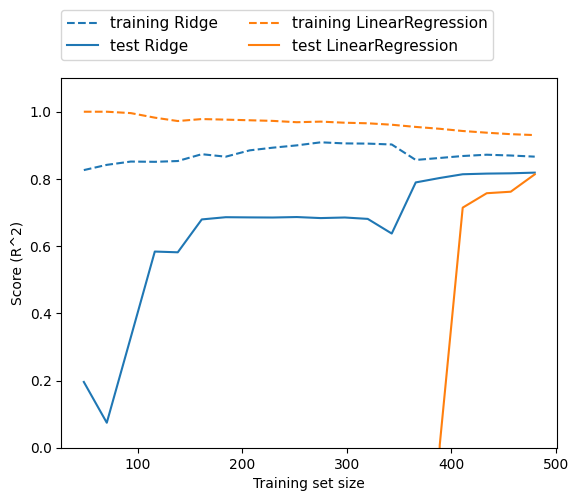

In [14]:
mglearn.plots.plot_ridge_n_samples()

2.3.3.4 ラッソ回帰
###### ラッソ回帰では計数ベクトルのL1ノルム，すなわち係数の絶対値の和にペナルティを与える(L1正則化)．

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))) 
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
"""
Training set score: 0.29
test set score: 0.21
Number of features used: 4
"""

Training set score: 0.29
test set score: 0.21
Number of features used: 4


'\nTraining set score: 0.29\ntest set score: 0.21\nNumber of features used: 4\n'

In [16]:
# "max_iter"の値を増やしている．
# こうしておかないとモデルが，"max_iter"を増やすように警告を発する

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features usef: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features usef: 33


In [17]:
# alpha は、Lasso 回帰モデルにおける正則化パラメータです。
# このパラメータは、モデルの複雑さを制御し、過学習を防ぐために使用されます。
# 具体的には、alpha の値が大きいほど、正則化の強度が増し、係数がゼロに近づきやすくなります。
# 逆に、alpha の値が小さいほど、正則化の強度が弱まり、モデルはデータに対してより柔軟になります。

In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

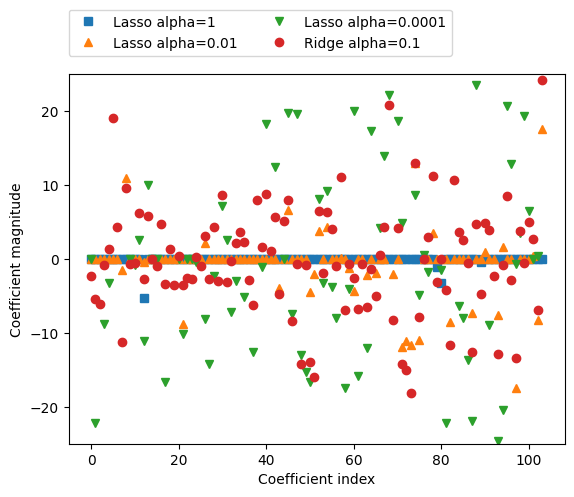

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")

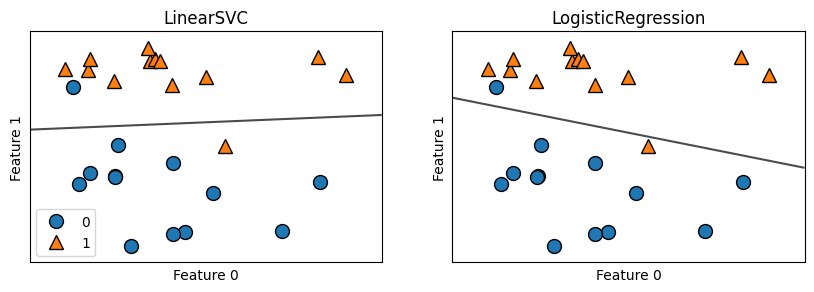

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

"""
このコードは、LinearSVCとLogisticRegressionの2つの分類器を使って、
データを分類し、各モデルがどのようにデータを分離するかをプロットします。
それぞれの分類器の結果（決定境界）が並んで表示され、
2つのモデルの違いが視覚的に比較できるようになっています。
"""

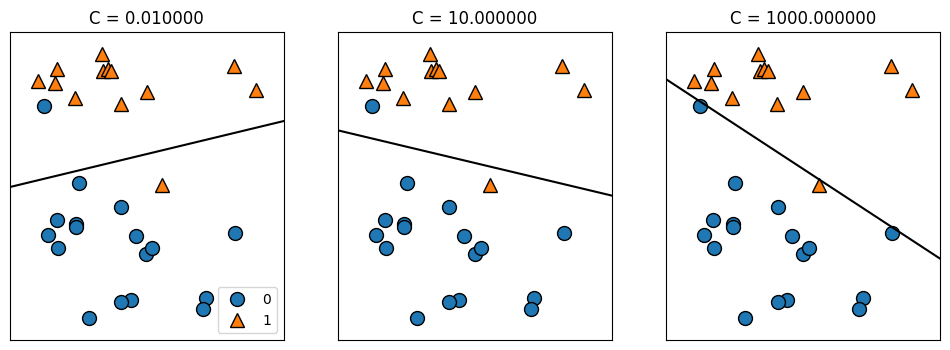

In [27]:
mglearn.plots.plot_linear_svc_regularization()

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3}".format(logreg.score(X_test, y_test)))

# 訓練セットとテストセットの性能が非常に近いため，適合不足である可能性が高い

Training set score: 0.955
Test set score: 0.951


c:\Users\kaidu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) # デフォルトではC=1
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

# C=100にすると，訓練セット制度が上昇し，テストセットの制度もわずかに上昇する
# 複雑なモデルの方が性能が高いはずだという直感は裏付けられた

Training set score: 0.944
Test set score: 0.965


c:\Users\kaidu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


c:\Users\kaidu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


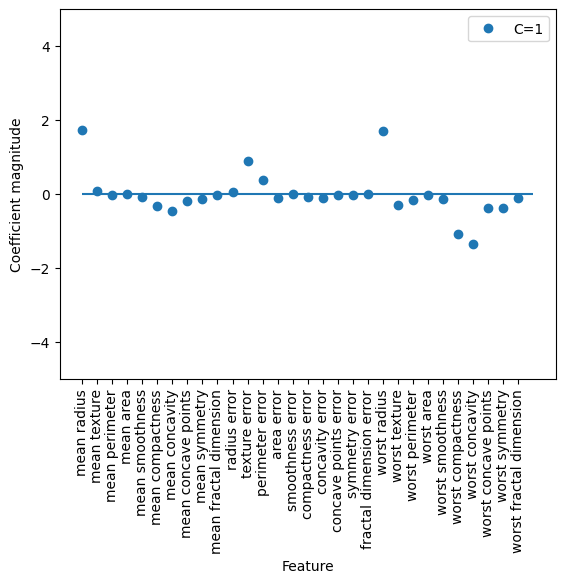

In [39]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
# plt.plot(logreg100.coef_.T, '^', label="C=100")
# plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

ご質問ありがとうございます。`C=1` のときの特徴量と係数の大きさの関係について、具体的な例を用いて詳しく解説いたします。

### ロジスティック回帰における `C` の役割再確認

まず、ロジスティック回帰における `C` パラメータの役割を再確認しましょう。

- **`C` は正則化の逆数**: 大きな `C` 値は正則化の強度を弱め、モデルはより複雑になります。一方、小さな `C` 値は正則化の強度を強化し、モデルはより単純化されます。
- **`C=1` はバランスの取れた正則化**: `C=1` は、過剰な正則化も過少な正則化も避け、適度なバランスを保つ設定とされています。

### グラフの解釈 (`C=1` の場合)

提供いただいたコードでは、`C=1`、`C=100`、`C=0.01` の3つの異なる正則化強度でロジスティック回帰モデルを訓練し、それぞれのモデルの係数をプロットしています。`C=1` のモデルについて具体的に見ていきましょう。

#### 具体的な例：特徴量「mean radius」

例えば、乳がんデータセット（恐らく `sklearn.datasets` の `breast_cancer` データセットを使用）に含まれる「mean radius」（平均半径）という特徴量があるとします。

1. **`C=1` の係数の大きさ**:
   - グラフ上で「mean radius」の位置にプロットされた丸印（`'o'`）の高さが、他の特徴量と比較して高い場合、この特徴量がモデルにおいて重要な役割を果たしていることを示します。
   - 例えば、「mean radius」の係数が `2.5` であり、これは他の多くの特徴量の係数が `±1` 未満であるとします。この場合、「mean radius」は腫瘍が悪性である確率に対して強い影響力を持っていることを意味します。

2. **解釈**:
   - 「mean radius」の係数が正で大きい場合、平均半径が増加するほど腫瘍が悪性である確率が高くなることを示します。
   - 逆に、係数が負であれば、平均半径が増加するほど腫瘍が良性である確率が高くなることを示します。

#### 他の特徴量との比較

「mean radius」以外にも、以下のような特徴量があり、それぞれに異なる係数が割り当てられています。

- **「mean texture」**: 係数が `1.5` であれば、「mean texture」も腫瘍の良性・悪性に対して比較的重要な特徴量と判断できます。
- **「mean perimeter」**: 係数が `-0.8` であれば、平均周囲長が増加すると腫瘍が良性である確率が高まることを示します。

### `C=1` の場合の特徴量の選択

`C=1` の場合、適度な正則化により、過剰に大きな係数を抑えつつ、重要な特徴量を適切に選択しています。具体的には：

- **重要な特徴量は顕著な係数を持つ**: 例えば、「mean radius」や「mean texture」など、腫瘍の性質をよく表す特徴量は高い係数を持ちます。
- **影響力の少ない特徴量は係数が小さい**: 「worst area」や「mean compactness」など、予測に対する影響が少ない特徴量は、小さな係数（正または負）となります。

### 実際のプロットの解釈例

以下に仮想的なプロットを基に具体例を示します。

```python
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データのロードと前処理
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルの訓練
logreg = LogisticRegression(C=1, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# 係数の取得
coefficients = logreg.coef_.flatten()

# プロット
plt.figure(figsize=(10, 6))
plt.plot(coefficients, 'o', label="C=1")
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.hlines(0, 0, len(cancer.feature_names)-1, colors='grey', linestyles='dashed')
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.title("Logistic Regression Coefficients (C=1)")
plt.legend()
plt.tight_layout()
plt.show()
```

この仮想的なプロットに基づき、以下のように解釈できます。

- **「mean radius」** の係数が `2.0` だった場合：
  - 「mean radius」は強い正の影響を持ち、腫瘍が悪性である確率を高める特徴量として重要です。
  
- **「mean symmetry」** の係数が `-1.2` だった場合：
  - 「mean symmetry」は負の影響を持ち、腫瘍が良性である確率を高める特徴量として機能していることを示します。
  
- **「mean concave points」** の係数が `0.3` だった場合：
  - この特徴量は正の影響を持つものの、他の特徴量に比べると影響力が小さいため、モデルにおける重要度は低めです。

### まとめ

`C=1` の場合、ロジスティック回帰モデルは適度な正則化を適用し、重要な特徴量に対して適切な係数を割り当てています。具体的な例として、「mean radius」のような特徴量が高い係数を持つ場合、その特徴量が腫瘍の性質（良性・悪性）を予測する上で強力な指標となっていることがわかります。

このように、`C=1` のモデルにおいては、各特徴量の係数の大きさがその特徴量の予測に対する影響力を反映しています。係数の解釈を通じて、どの特徴量がモデルにとって重要であり、どの特徴量がそうでないかを理解することが可能です。

さらに深い分析を行うためには、以下のステップをお勧めします：

1. **特徴量の重要度ランキング**:
   - 係数の絶対値が大きい順に特徴量をランキングし、上位の特徴量に注目します。

2. **交差検証による評価**:
   - `C=1` のモデルの性能を交差検証で評価し、他の `C` 値と比較します。

3. **モデルの解釈性向上**:
   - 特徴量の相関や多重共線性の有無を確認し、必要に応じて特徴量選択や次元削減を行います。

これらの分析を通じて、`C=1` の設定があなたのデータと目的に対して最適であるかどうかを総合的に判断することができます。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\kaidu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


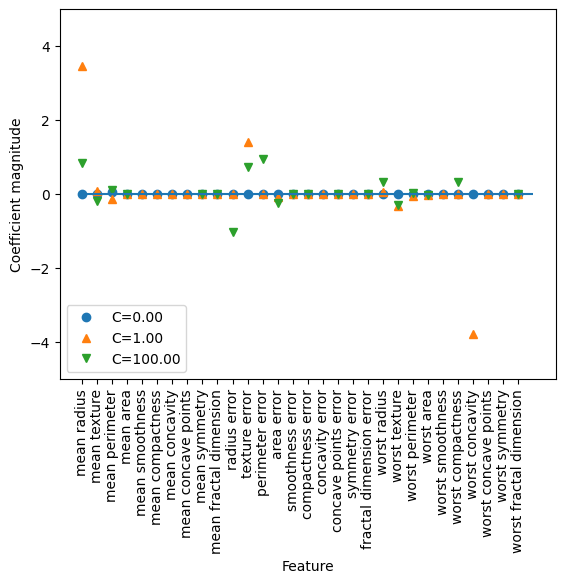

In [48]:
# L1正則化
# この正則化はわずかな特徴量しか使わないように政権するのでより解釈しやすい

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1= LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)
        ))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)
        ))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.2f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude") # 係数の大きさ

plt.ylim(-5, 5)
plt.legend(loc=3)

この図とコードから理解できるのは、2クラス分類と回帰の線形モデルは基本的に似た構造を持ち、主な違いはペナルティパラメータ（正則化）の設定にあるということです。ペナルティパラメータの調整により、モデルの複雑さや使用する特徴量の数をコントロールできるため、適切な設定を選ぶことが重要です。L1正則化を用いることで、自動的に特徴選択が行われ、モデルをシンプルかつ解釈しやすくすることが可能です。

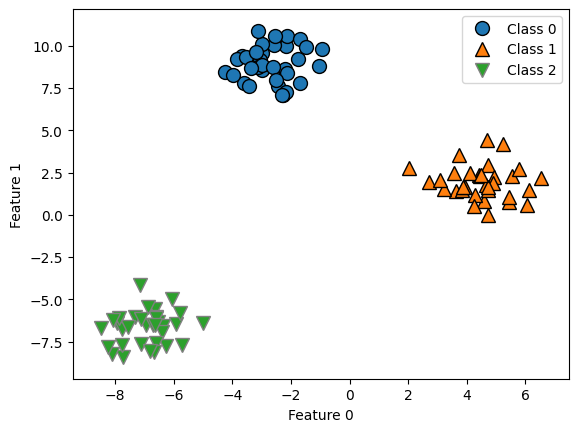

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [61]:
# LinearSVCクラス分類器をこのデータセットで学習させてみる

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)    # 係数配列の形状
print("Intercept shape: ", linear_svm.intercept_.shape) # 切片配列の形状

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


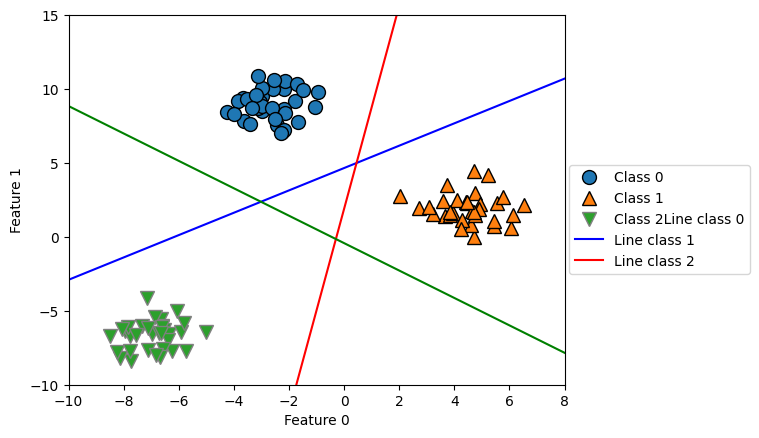

In [62]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2' 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

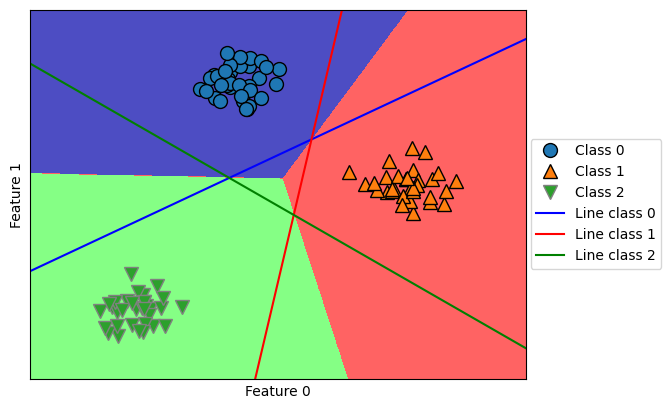

In [64]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")